# 参考ANN的代码
[EEG-Motor-Imagery-Classification---ANN](https://github.com/BUVANEASH/EEG-Motor-Imagery-Classification---ANN/blob/master/MNE_WPD_CSP_ANN.ipynb)


1. raw数据加载
2. events和epoch提取
3. epoch平均
4. 获取labels和data
5. 可以加个ICA降噪

In [43]:
import mne
%matplotlib inline
import numpy as np
import os

In [44]:
# 读取文件目录列表

directory_path = "./Data/BCI2a/gdf/"

# 获取目录中的文件列表
file_list = os.listdir(directory_path)
train_list = []

# 遍历文件列表
for filename in file_list:
    # 处理文件，例如打印文件名
    if filename.endswith('T.gdf'):
        # 处理文件，例如打印文件名
        train_list.append(filename)
        # print("File:", filename)

print(train_list)

['A01T.gdf', 'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf', 'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf']


In [50]:
# Mention the file path to the dataset
rawFile = train_list[4]     # 文件名 'A01T.gdf'
rawFilePath = directory_path + rawFile      # 完整路径 "./Data/BCI2a/gdf/A01T.gdf"
filePrefix = os.path.splitext(rawFile)[0]   # 获取文件前缀名 "A01T"

raw = mne.io.read_raw_gdf(rawFilePath)

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from d:\Codeprojects\GraduateProject\Data\BCI2a\gdf\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-12-16 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


d:\Application\anaconda3\envs\Gpro\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [51]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data

raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz

raw.filter(8., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels

raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes

tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


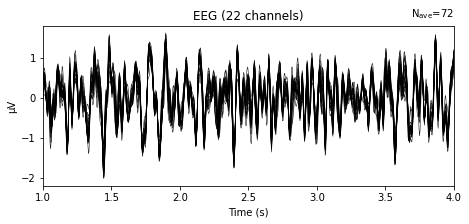

<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


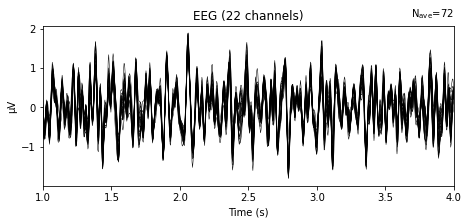

<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


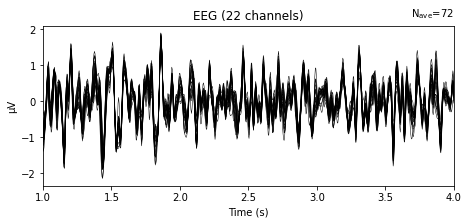

<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


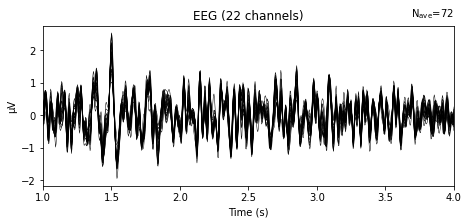

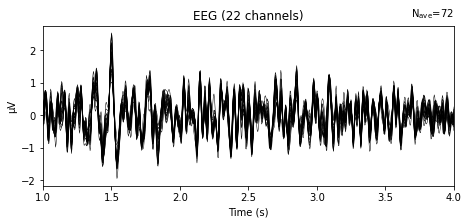

In [52]:
# 用evoke进行可视化

# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
# Left hand epoch average plot

evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot

evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot

evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot

evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [53]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 

data = epochs.get_data()

print(labels)
print(data.shape)

# (288,72, 751)
# 288: 表示时期（epochs）的数量，也就是你的数据集中有288个时期。
# 22: 表示通道的数量，每个时期有22个通道的 EEG 数据。
# 751: 表示每个通道上的时间点数，即每个时期的 EEG 数据包含751个时间点。3s * 每秒采集250 + 1（0-base索引）

[1 2 2 1 2 1 2 3 2 4 1 3 2 1 4 4 4 4 4 1 3 2 1 1 3 4 1 3 3 3 1 2 1 2 2 1 2
 3 2 3 3 4 3 3 4 4 4 4 4 3 2 1 1 2 3 4 2 3 1 1 1 4 2 2 1 1 3 1 2 4 4 3 1 4
 4 2 4 4 2 1 2 3 3 3 4 3 1 4 2 3 2 3 4 2 3 1 1 1 4 2 1 3 1 3 2 4 1 3 3 1 3
 2 4 4 4 3 1 4 2 4 2 1 3 2 1 3 3 1 3 4 4 2 1 2 4 2 4 3 2 2 2 3 4 1 2 4 1 3
 3 4 1 1 3 2 4 4 4 2 1 3 2 4 1 4 3 2 4 4 1 2 2 3 4 2 1 1 4 2 1 3 2 2 3 1 4
 3 3 3 3 1 2 1 2 1 1 3 3 2 3 4 1 4 1 1 2 4 3 2 4 3 4 3 4 2 2 4 1 2 2 2 3 4
 1 4 1 3 1 4 1 3 1 2 3 3 4 1 2 4 2 3 3 1 4 2 4 1 1 3 3 2 4 2 2 1 2 4 4 2 2
 2 2 4 4 3 4 1 2 3 2 1 4 1 4 1 1 1 1 3 3 4 2 3 3 3 4 3 1 3]
(288, 22, 751)


D:\TEMP\ipykernel_16364\1269809192.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [54]:
# 保存数据
label_save_directory = './DataProcessed/BCI2a/labels/' 
data_save_directory = './DataProcessed/BCI2a/data/'

if not os.path.exists(label_save_directory):
    os.makedirs(label_save_directory)

if not os.path.exists(data_save_directory):
    os.makedirs(data_save_directory)


# 保存标签到指定目录
np.save(os.path.join(label_save_directory, 'labels_'+ filePrefix + '.npy'), labels)
# 保存数据到指定目录
np.save(os.path.join(data_save_directory, 'data_' + filePrefix + '.npy'), data)
